Running Quick Demo...

Results:
Standard A*: Time=0.0084s, Visited=1280
AILS A*: Time=0.0052s, Visited=821
Improvement: 38.5%


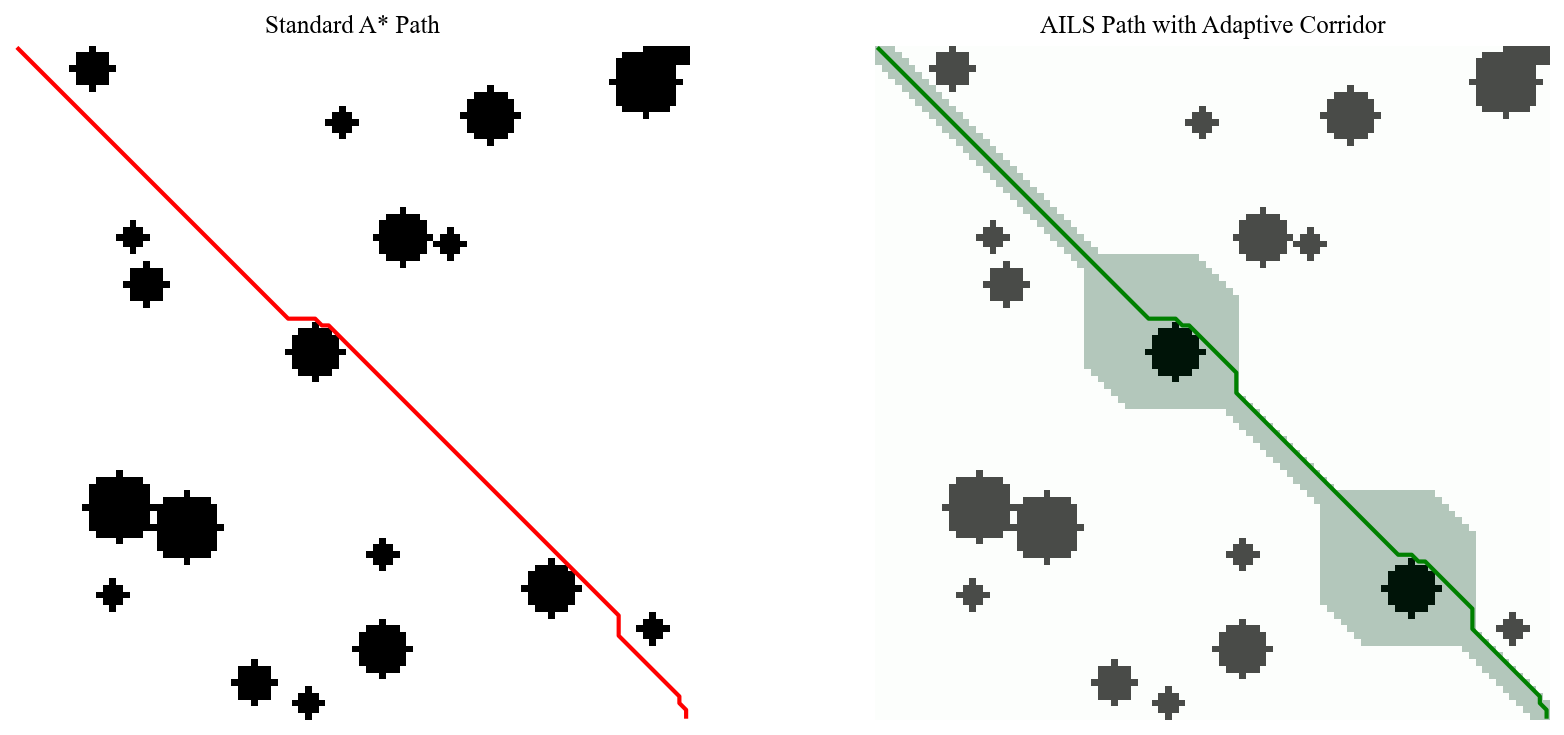


    ╔════════════════════════════════════════════════════════════════╗
    ║     ADAPTIVE INCREMENTAL LINE SEARCH (AILS) FRAMEWORK         ║
    ║            Comprehensive Research Evaluation                   ║
    ╔════════════════════════════════════════════════════════════════╝
    
COMPREHENSIVE PATHFINDING EXPERIMENT
Grid Sizes: [50, 100, 200]
Obstacle Densities: ['10%', '20%', '30%']
Trials per configuration: 10
Total trials (configurations): 450
--------------------------------------------------------------------------------
Running experiments in parallel with 6 workers (context: spawn)...


Running experiments: 100%|████████████████████| 450/450 [01:20<00:00,  5.61it/s]



Results saved to: results/data/experiment_results_20251110_152912.csv
Pickle saved to: results/data/experiment_results_20251110_152912.pkl

EXPERIMENT COMPLETED
Total experiments run: 2700
Unique configurations: 45

STATISTICAL ANALYSIS

A*:
  AILS vs Standard: 0.86% improvement (95% CI: [-6.31, 8.03])
  P-value: 0.000000
  Effect size: 0.323

Dijkstra:
  AILS vs Standard: 77.64% improvement (95% CI: [73.28, 82.00])
  P-value: 0.000000
  Effect size: 1.247

BFS:
  AILS vs Standard: 76.32% improvement (95% CI: [72.04, 80.60])
  P-value: 0.000000
  Effect size: 1.241

GENERATING VISUALIZATIONS


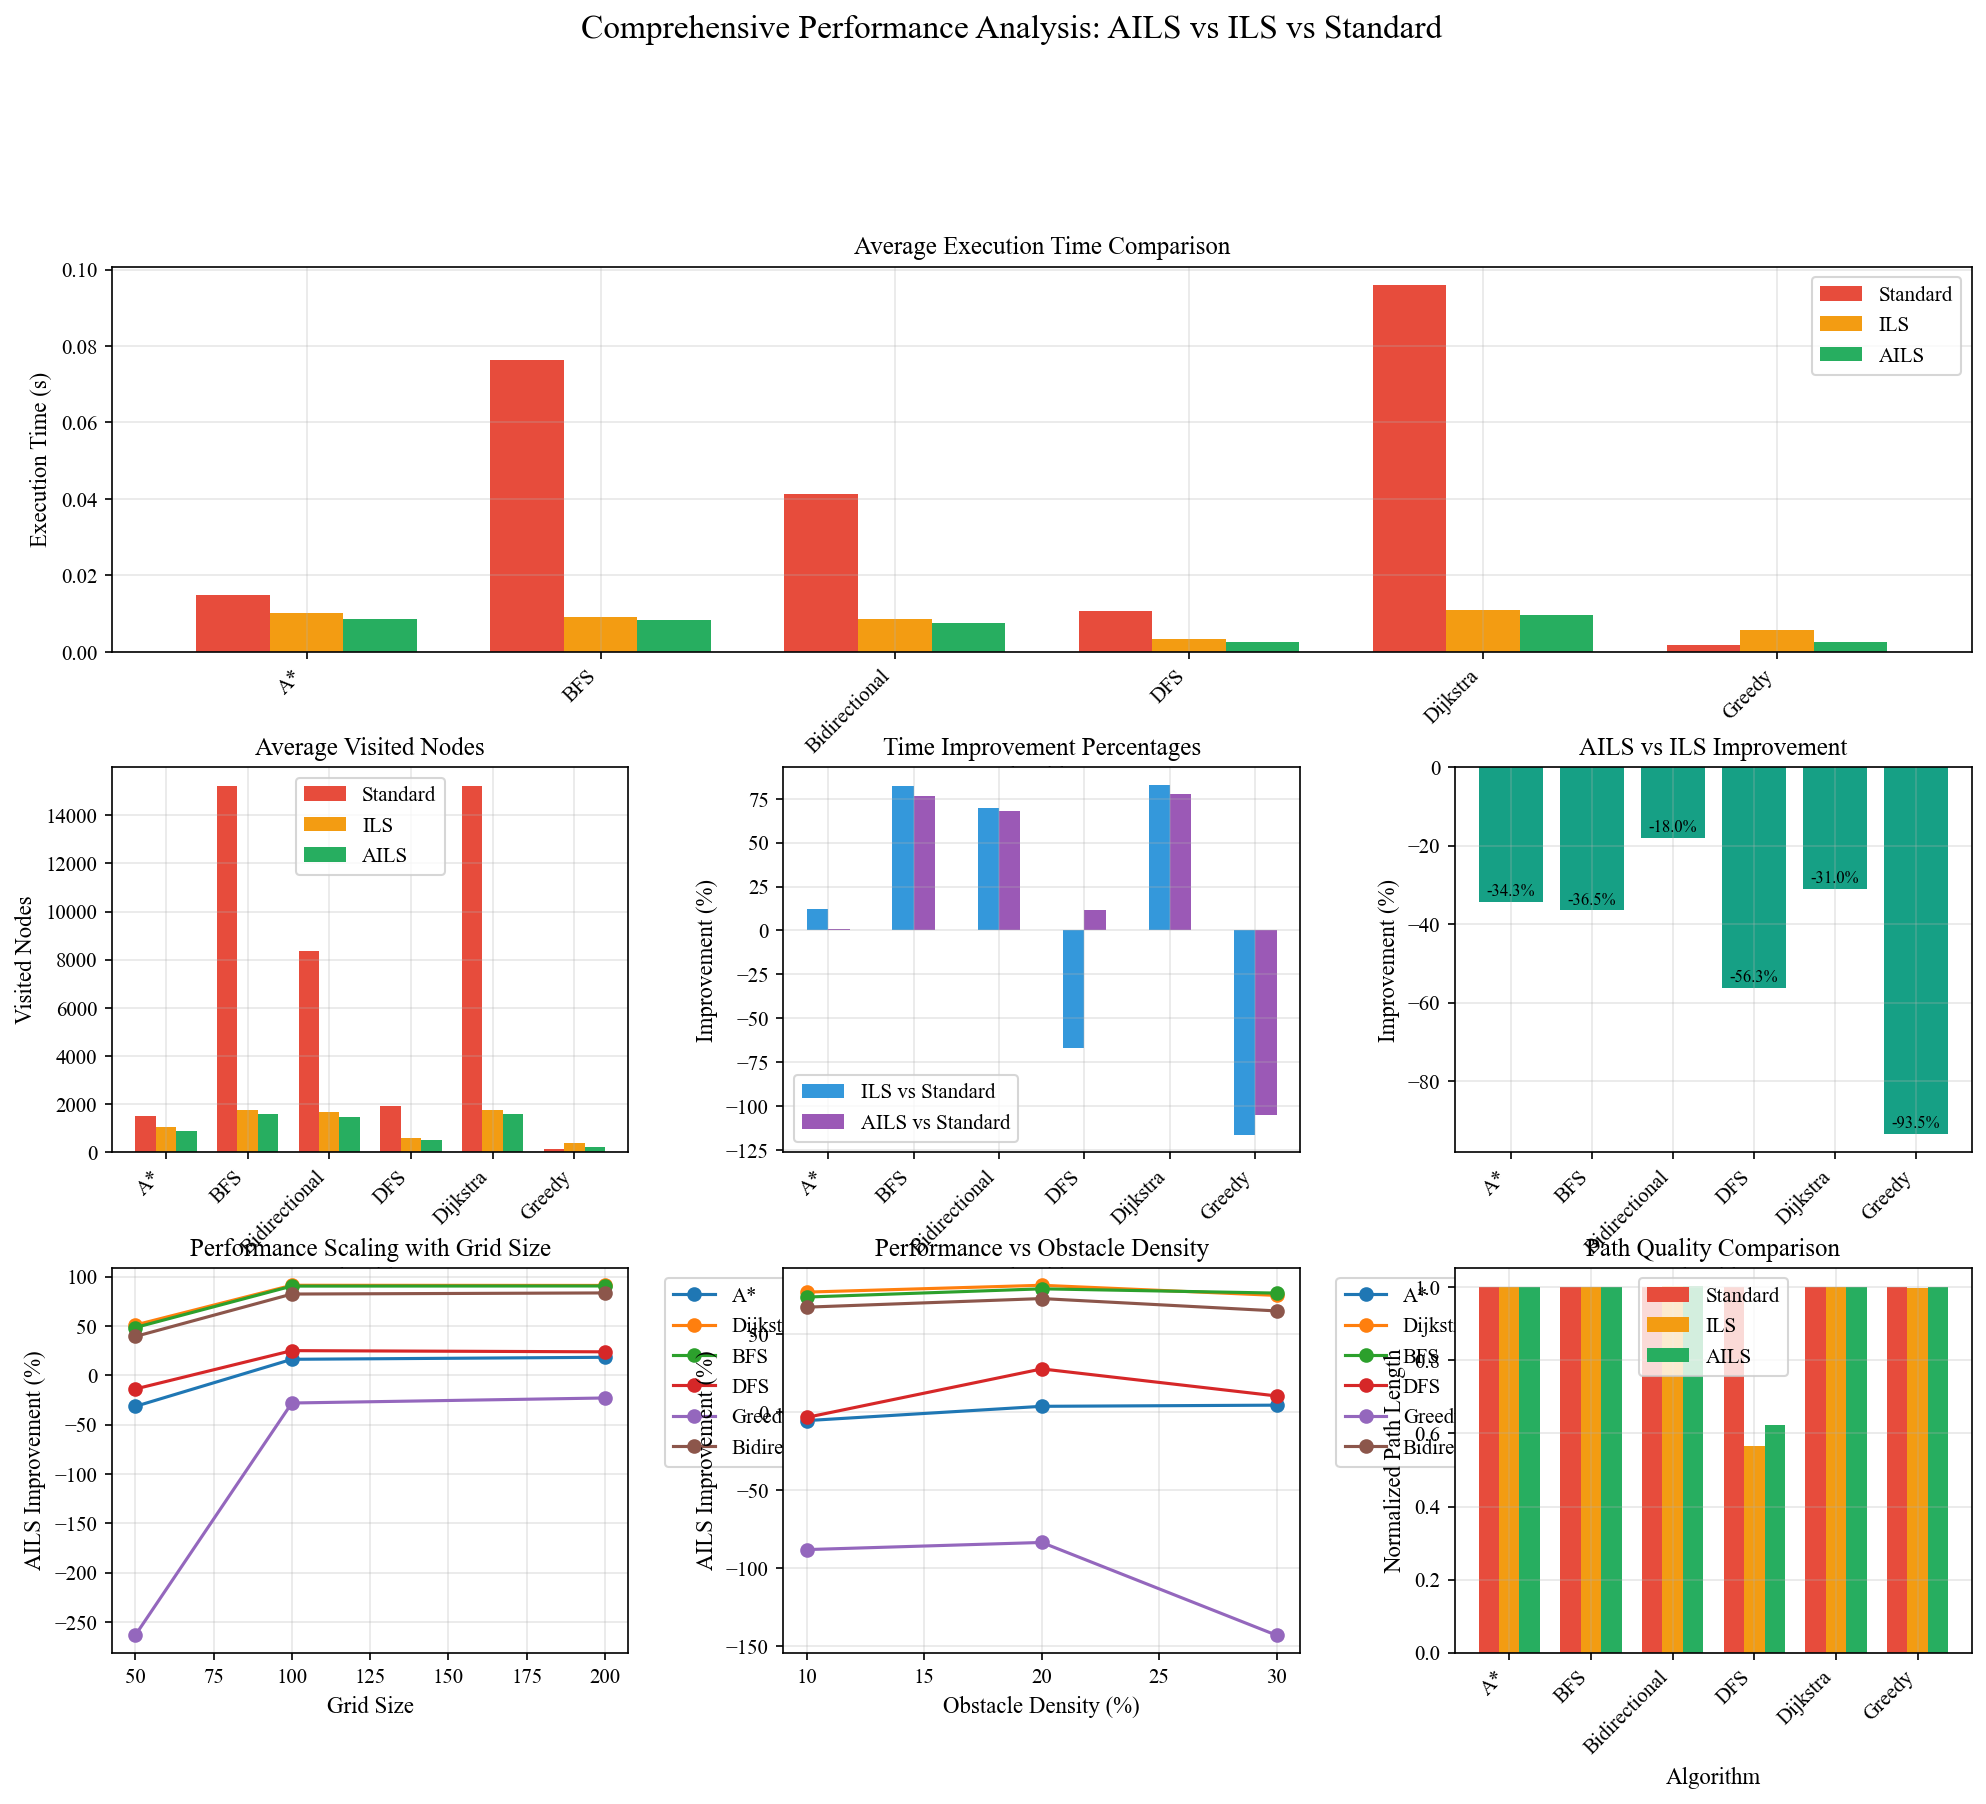

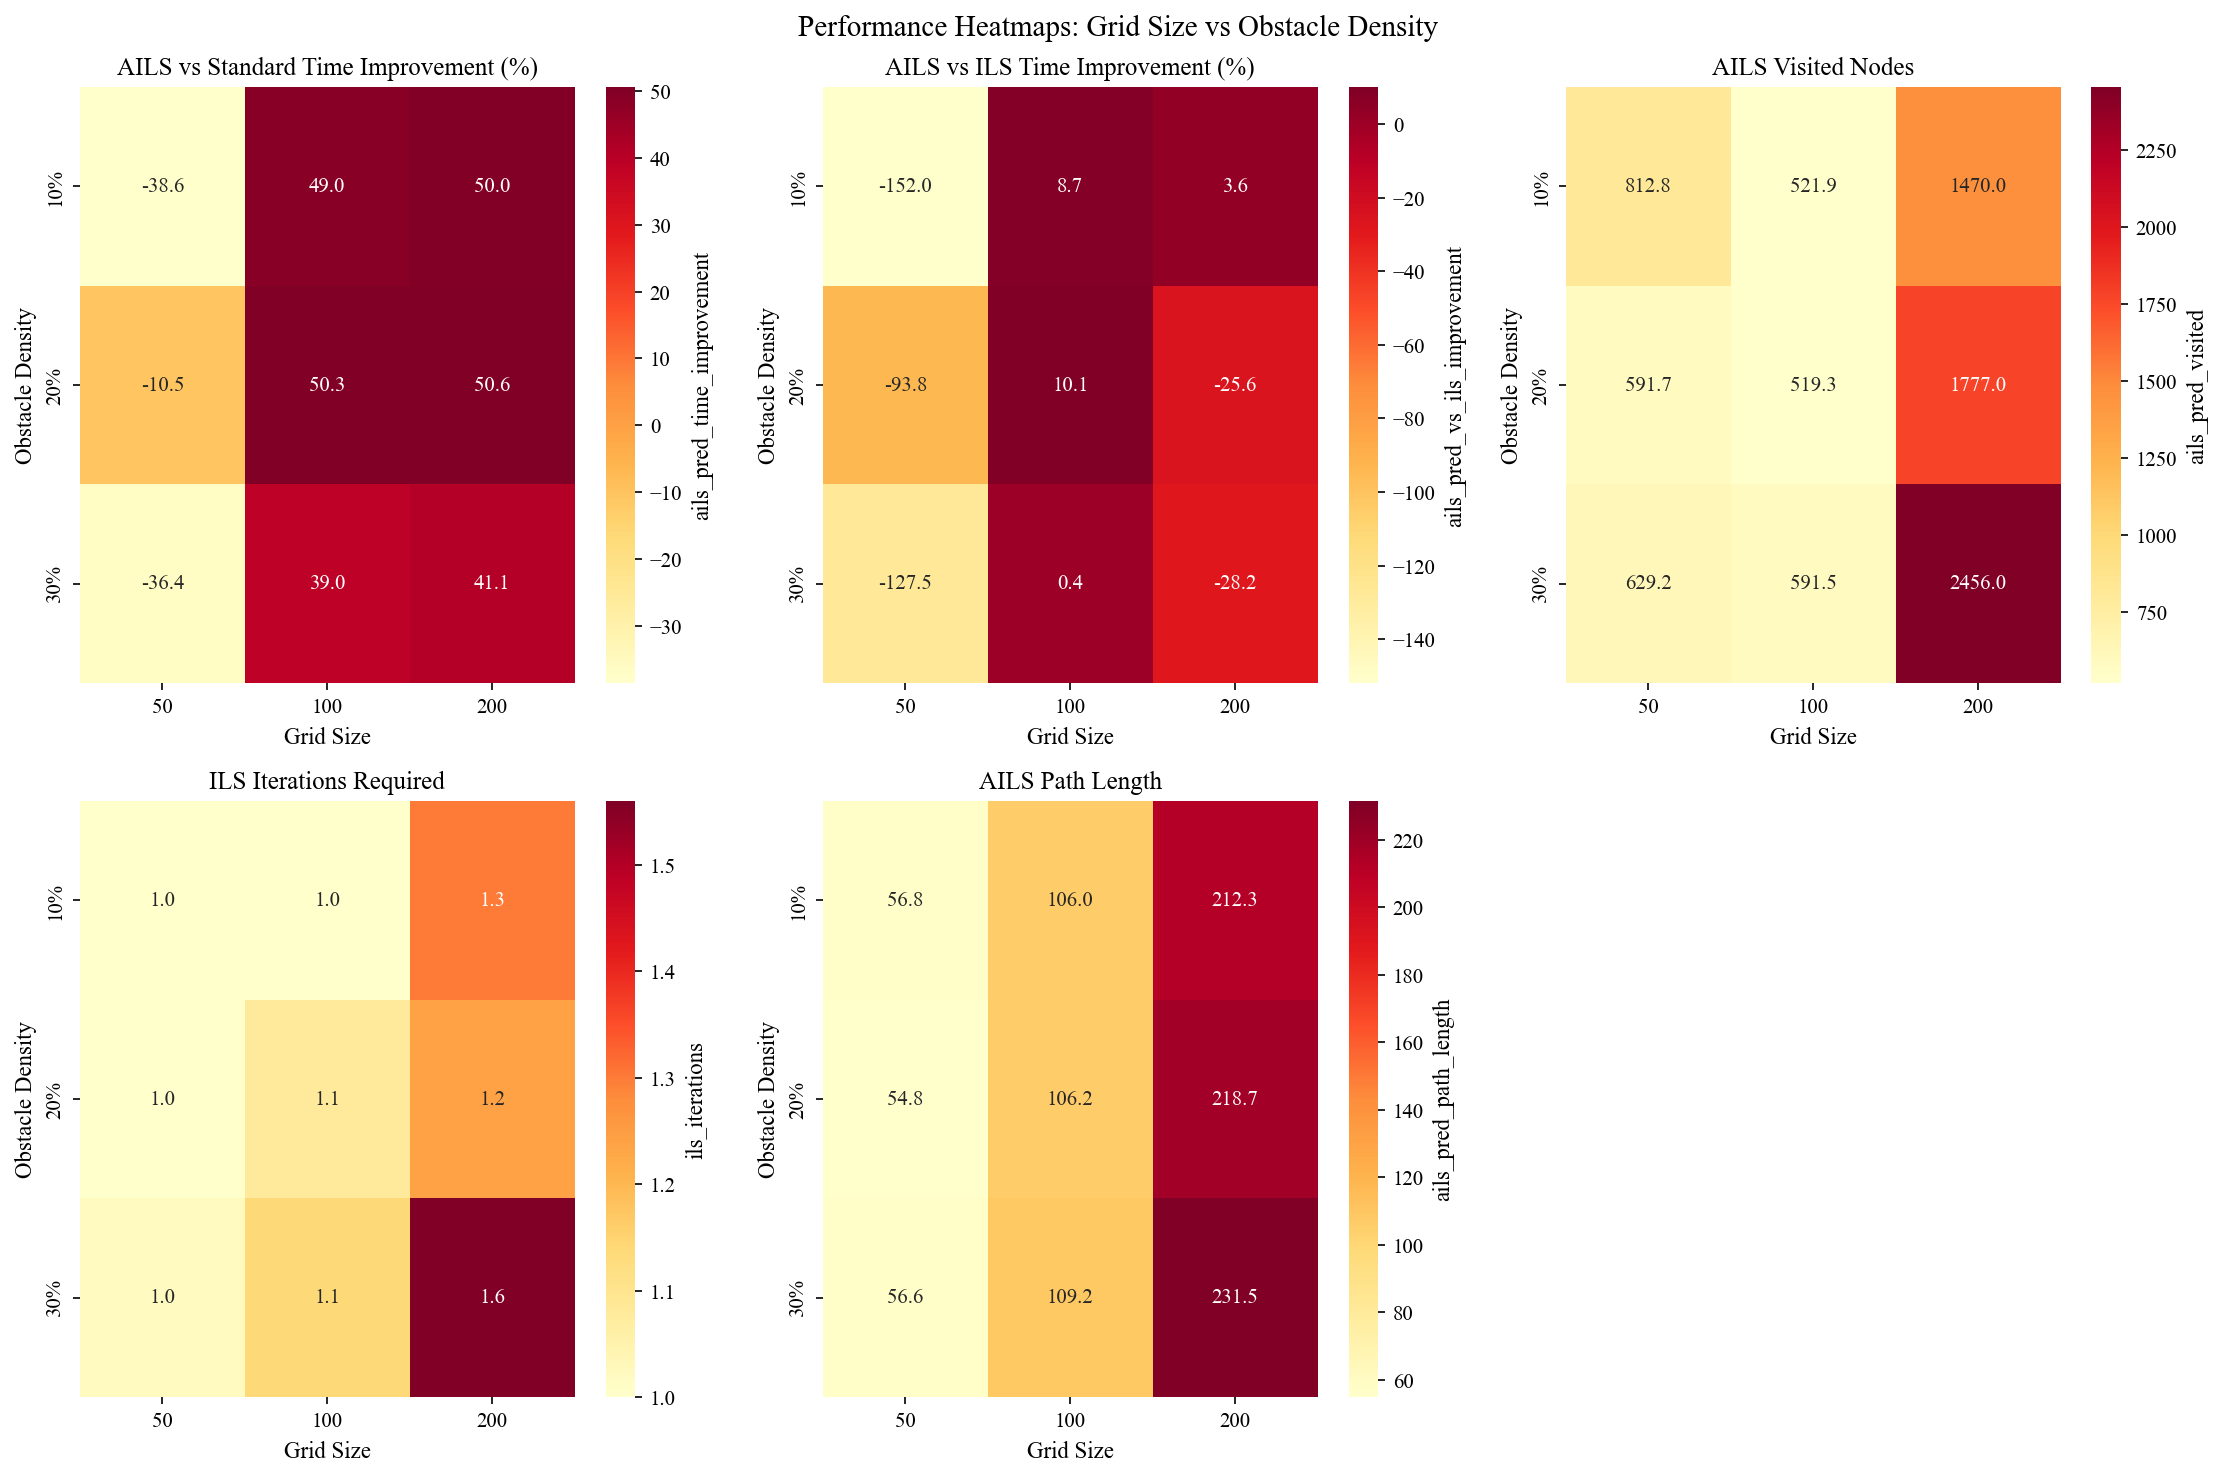

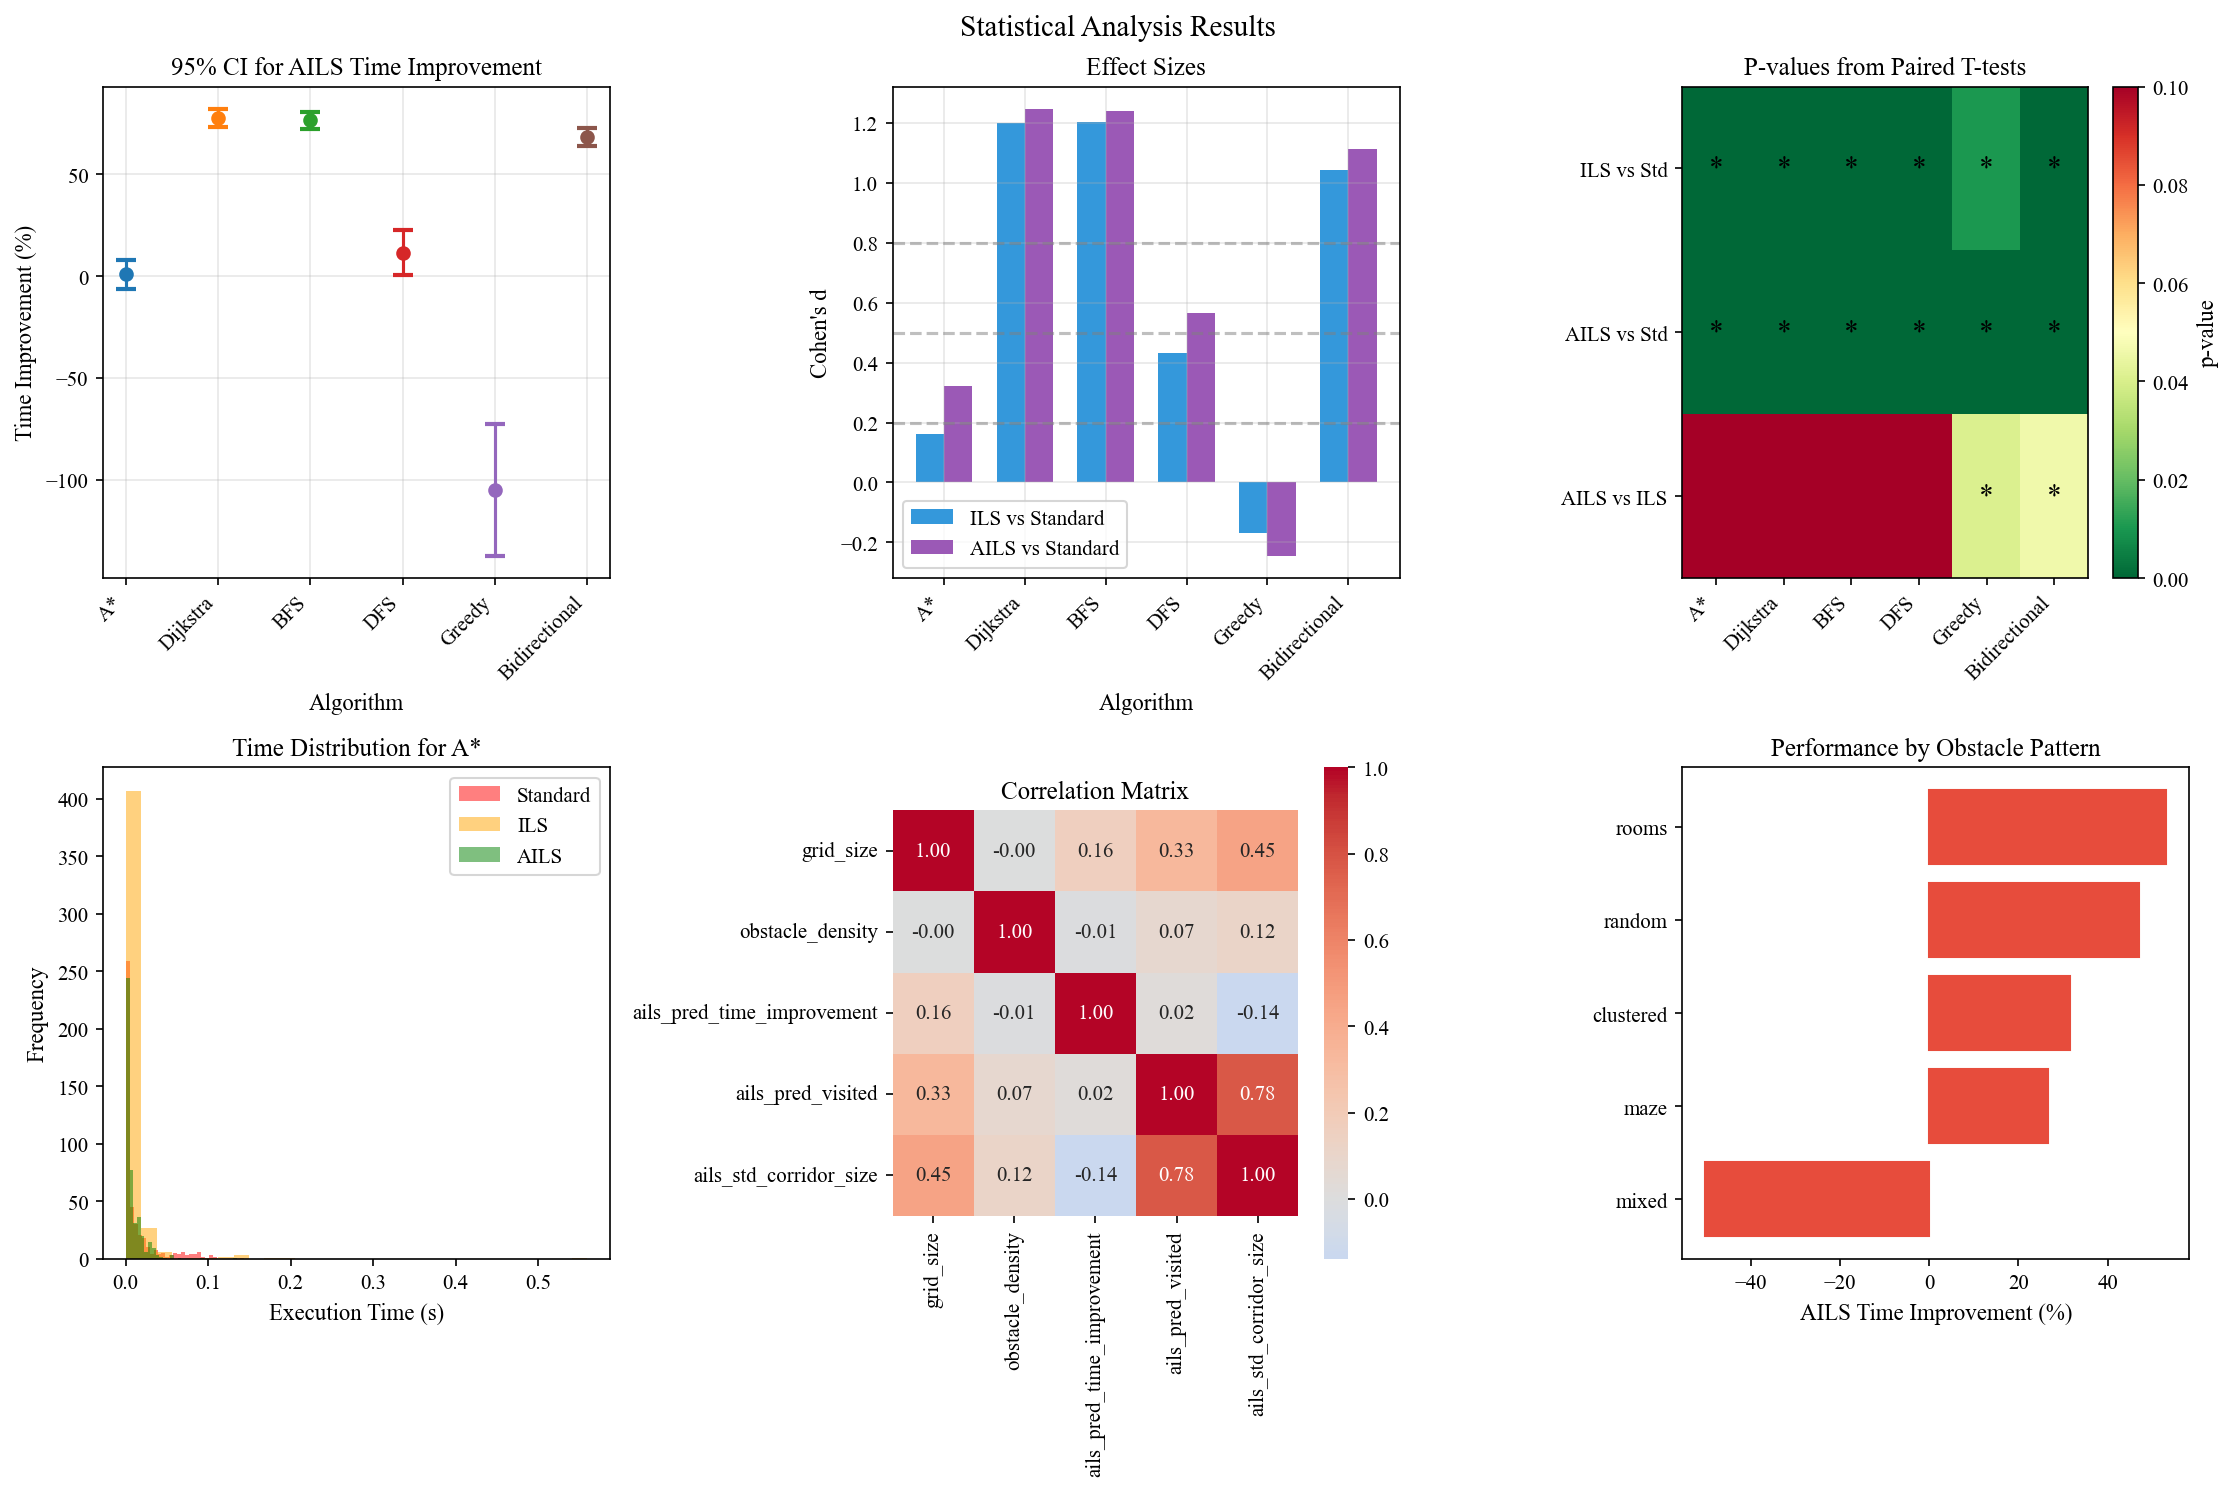


GENERATING LATEX TABLES
LaTeX tables saved to results/analysis/

SUMMARY REPORT
Overall AILS Performance:
  Average improvement: 21.60%
  Best case improvement: 98.37%
  Worst case improvement: -2854.69%

Best performing algorithm: Dijkstra
Best performing pattern: rooms

Files saved:
  - CSV: results/data/experiment_results_*.csv
  - Figures: results/figures/*.png
  - LaTeX: results/analysis/latex_tables_*.tex

Script finished.


In [20]:
"""
AILS Experiment Runner
======================

This is the main executable script for running the AILS experiments.
It imports all core logic from 'ails_core.py' and runs the
experiments within an 'if __name__ == "__main__"' block.

This structure is required to make multiprocessing compatible with
Jupyter notebooks, Windows, and macOS.

To run:
1.  Save this file as 'run_experiments.py'.
2.  Save the other file as 'ails_core.py' in the same directory.
3.  Run this file from your terminal:
    python run_experiments.py
    
    ...or copy the contents of this file into a single
    Jupyter Notebook cell and run it.
"""

import sys
from ails_core import *

# ============================================================================
# MAIN EXECUTION FUNCTIONS
# ============================================================================

def run_comprehensive_experiment():
    """Execute the complete experimental framework"""
    
    print("""
    ╔════════════════════════════════════════════════════════════════╗
    ║     ADAPTIVE INCREMENTAL LINE SEARCH (AILS) FRAMEWORK         ║
    ║            Comprehensive Research Evaluation                   ║
    ╔════════════════════════════════════════════════════════════════╝
    """)
    
    # Initialize configuration
    config = ExperimentConfig(
        grid_sizes=[50, 100, 200],  # Reduced for reasonable execution time
        obstacle_densities=[0.10, 0.20, 0.30],
        trials_per_config=10,  # Reduced for reasonable execution time
        use_multiprocessing=True,
        num_workers=max(1, mp.cpu_count() - 2) # Leave 2 CPUs free
    )
    
    # Run experiments
    runner = ExperimentRunner(config)
    df = runner.run_experiments()
    
    if df.empty:
        print("\n" + "="*80)
        print("EXPERIMENT FAILED: No results generated.")
        print("="*80)
        return None, None
        
    print("\n" + "="*80)
    print("EXPERIMENT COMPLETED")
    print("="*80)
    print(f"Total experiments run: {len(df)}")
    print(f"Unique configurations: {len(df.groupby(['grid_size', 'obstacle_density', 'pattern']))}")
    
    # Statistical analysis
    print("\n" + "="*80)
    print("STATISTICAL ANALYSIS")
    print("="*80)
    
    stats_results = StatisticalAnalysis.analyze_results(df)
    
    # Print key findings
    for alg in ['A*', 'Dijkstra', 'BFS']:
        if alg in stats_results:
            mean, lower, upper = stats_results[alg]['time_improvement']['ails_vs_std']
            print(f"\n{alg}:")
            print(f"  AILS vs Standard: {mean:.2f}% improvement (95% CI: [{lower:.2f}, {upper:.2f}])")
            print(f"  P-value: {stats_results[alg]['t_tests']['ails_vs_std']['p_value']:.6f}")
            print(f"  Effect size: {stats_results[alg]['effect_sizes']['ails_vs_std']:.3f}")
    
    # Visualization
    print("\n" + "="*80)
    print("GENERATING VISUALIZATIONS")
    print("="*80)
    
    ComprehensiveVisualization.plot_performance_comparison(df)
    ComprehensiveVisualization.plot_heatmaps(df)
    ComprehensiveVisualization.plot_statistical_analysis(df, stats_results)
    
    # Generate LaTeX tables
    if config.generate_latex_tables:
        print("\n" + "="*80)
        print("GENERATING LATEX TABLES")
        print("="*80)
        LatexTableGenerator.save_tables(df)
    
    # Summary report
    print("\n" + "="*80)
    print("SUMMARY REPORT")
    print("="*80)
    
    overall_improvement = df['ails_pred_time_improvement'].mean()
    best_case = df['ails_pred_time_improvement'].max()
    worst_case = df['ails_pred_time_improvement'].min()
    
    print(f"Overall AILS Performance:")
    print(f"  Average improvement: {overall_improvement:.2f}%")
    print(f"  Best case improvement: {best_case:.2f}%")
    print(f"  Worst case improvement: {worst_case:.2f}%")
    
    print(f"\nBest performing algorithm: {df.groupby('algorithm')['ails_pred_time_improvement'].mean().idxmax()}")
    print(f"Best performing pattern: {df.groupby('pattern')['ails_pred_time_improvement'].mean().idxmax()}")
    
    print("\nFiles saved:")
    print(f"  - CSV: results/data/experiment_results_*.csv")
    print(f"  - Figures: results/figures/*.png")
    print(f"  - LaTeX: results/analysis/latex_tables_*.tex")
    
    return df, stats_results

# ============================================================================
# QUICK DEMO
# ============================================================================

def quick_demo():
    """Run a quick demonstration with visualization"""
    print("Running Quick Demo...")
    
    # Generate sample grid
    grid = AdvancedGridGenerator.generate(
        100, 0.2, AdvancedGridGenerator.ObstaclePattern.CLUSTERED, seed=42
    )
    
    start = (0, 0)
    goal = (99, 99)
    
    # Initialize algorithms
    config = ExperimentConfig()
    ails = AdaptiveILS(grid, config)
    
    # Run A* with different configurations
    result_std = ComprehensivePathfinding.a_star(grid, start, goal, None)
    result_ails = ails.search(ComprehensivePathfinding.a_star, start, goal, 'predictive')
    
    print(f"\nResults:")
    print(f"Standard A*: Time={result_std['time']:.4f}s, Visited={result_std['visited']}")
    print(f"AILS A*: Time={result_ails['time']:.4f}s, Visited={result_ails['visited']}")
    if result_std['time'] > 0:
        print(f"Improvement: {((result_std['time'] - result_ails['time'])/result_std['time']*100):.1f}%")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot grid with paths
    axes[0].imshow(grid, cmap='binary')
    if result_std['path']:
        path_array = np.array(result_std['path'])
        axes[0].plot(path_array[:, 1], path_array[:, 0], 'r-', linewidth=2, label='Standard A*')
    axes[0].set_title('Standard A* Path')
    axes[0].axis('off')
    
    axes[1].imshow(grid, cmap='binary')
    if result_ails['path']:
        path_array = np.array(result_ails['path'])
        axes[1].plot(path_array[:, 1], path_array[:, 0], 'g-', linewidth=2, label='AILS')
    
    # Show corridor
    corridor = ails.corridor_builder.compute_adaptive_corridor(start, goal, 'predictive')
    corridor_mask = np.zeros_like(grid)
    for point in corridor:
        if 0 <= point[0] < 100 and 0 <= point[1] < 100:
            corridor_mask[point[0], point[1]] = 1
    axes[1].imshow(corridor_mask, cmap='Greens', alpha=0.3)
    axes[1].set_title('AILS Path with Adaptive Corridor')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# NOTEBOOK INTERFACE
# ============================================================================

if __name__ == "__main__":
    
    # This __name__ == "__main__" block is ESSENTIAL for
    # multiprocessing to work correctly, especially in
    # Jupyter notebooks or when running as a script.
    
    # ------------------------------------------------------------------------
    # Your requested lines are below:
    # ------------------------------------------------------------------------
    
    # 1. To run a short experiment (quick demo):
    quick_demo()
    
    # 2. To run the whole experiment (uncomment the line below):
    df, stats = run_comprehensive_experiment()
    
    print("\nScript finished.")